### Sample data on ads

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [170]:
# read data

ads_data = pd.read_csv('/Users/viktorial/viktoria/Karpov/Data/Data_for_python/ads_data.csv', parse_dates=[3])

In [171]:
# take a look at the data

ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29
...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319


In [172]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
dtype: object

In [173]:
# create a column with date and time

ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [ ]:
# Let's check if we have a bug in our data regarding number of views and clicks

In [ ]:
# replacing NaN with 0

ad_by_click_by_view = ad_by_click_by_view.fillna(0)

In [206]:
# Looks like we have a bug: some ads have clicks but don't have views 

ad_by_click_by_view.query('click != 0 and view == 0')

event,ad_id,click,view,CTR
50,25665,14.0,0.0,0.0
77,30381,77.0,0.0,0.0
150,41424,2.0,0.0,0.0
161,42241,126.0,0.0,0.0
213,45866,21.0,0.0,0.0
219,46363,7.0,0.0,0.0
224,46544,14.0,0.0,0.0
294,113348,16.0,0.0,0.0
331,120444,9.0,0.0,0.0


In [207]:
# clicks that don't have values

ad_by_click_by_view.query('click == 0').shape[0]

40

In [208]:
# selecting ad_ids that don't have data on clicks

ad_ids_bug = ad_by_click_by_view.query('click == 0').ad_id

In [209]:
# Bugs by platform

ads_data[ads_data.ad_id.isin(ad_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_cost_type':'count'}) \
    .rename(columns={'ad_cost_type':'bugs'}) \
    .sort_values('bugs')

,platform,bugs
2,web,1988
1,ios,3075
0,android,4906


In [210]:
# Total logs

ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_cost_type':'count'}) \
    .rename(columns={'ad_cost_type':'number_of_devices'}) \
    .sort_values('number_of_devices')

,platform,number_of_devices
2,web,635425
1,ios,953078
0,android,1588211


In [211]:
# There are clicks w/o view present on each platform

<AxesSubplot:xlabel='date'>

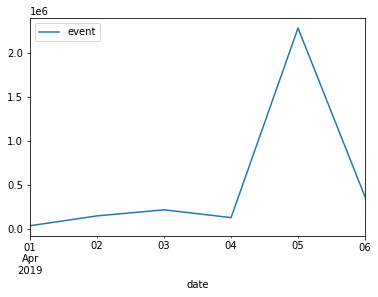

In [174]:
# Now let's take a look at events by day

ads_data.groupby('date', as_index=False) \
        .agg({'event':'count'}) \
        .plot(x='date', y='event')

In [175]:
# There is a clear spike of views/ clicks on 2019-04-05. 
# Let's look at views and clicks separately

ads_data.groupby(['date', 'event'], as_index=False) \
        .agg({'ad_cost_type':'count'}) \
        .pivot(index='date', columns='event', values='ad_cost_type') \
        .reset_index() \
        .sort_values('view', ascending=False)

event,date,click,view
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287
2,2019-04-03,1678,214851
1,2019-04-02,1518,145811
3,2019-04-04,1517,126182
0,2019-04-01,735,34832


In [176]:
# Both clicks and views spiked on 2019-04-05
# Looking at number of events for each ad_id on 2019-04-05

ads_data.query('date == "2019-04-05"') \
        .groupby(['ad_id', 'event'], as_index=False) \
        .agg({'ad_cost_type':'count'}) \
        .rename(columns={'ad_cost_type':'number_of_events'}) \
        .sort_values('number_of_events', ascending=False).head()

,ad_id,event,number_of_events
183,112583,view,1666404
182,112583,click,500207
44,29927,view,27140
108,44635,view,8171
136,46583,view,7242


In [177]:
# number of clicks and views for each ad_id on 2019-04-05

ads_data.query('date == "2019-04-05"') \
        .groupby(['campaign_union_id', 'event'], as_index=False) \
        .agg({'ad_cost_type':'count'}) \
        .rename(columns={'ad_cost_type':'number_of_events'}) \
        .sort_values(by='number_of_events', ascending=False).head()

,campaign_union_id,event,number_of_events
182,112260,view,1666404
181,112260,click,500207
43,29901,view,27140
107,44635,view,8171
135,46583,view,7242


In [178]:
# ad_id 112583 and campaign_union_id 112260 really stand out. let's check if this is the same ad

raw_with_data_for_campaign_112260 = ads_data.query('campaign_union_id == 112260').head(1)

ads_data.loc[raw_with_data_for_campaign_112260.campaign_union_id, ['ad_id', 'campaign_union_id']] \
        .reset_index() \
        .rename(columns={'index':'add_id'}) \
        .drop(columns=['ad_id'])

,add_id,campaign_union_id
0,112260,35378


In [179]:
# ad_id 112583 is running under campaign_union_id 112260. What was hapenning to this ad on other days?

ads_data.query('ad_id == 112583') \
        .groupby('date', as_index=False) \
        .agg({'time':'count'}) \
        .rename(columns={'time':'number_of_events'})

,date,number_of_events
0,2019-04-05,2166611
1,2019-04-06,348613


In [180]:
# The spike on 2019-04-05 was caused by ad_id 112583 which was only live for 2 days.
# Looks like a short-term campaign

In [181]:
# Now let's have a look at CTR

In [182]:
# number of clicks and views for each ad_id

ad_by_click_by_view = ads_data.groupby(['ad_id', 'event'], as_index=False) \
                                .agg({'time':'count'}) \
                                .pivot(index='ad_id', columns='event', values='time') \
                                .reset_index()
ad_by_click_by_view.head()

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0


In [183]:
# Add new column with CTR

ad_by_click_by_view = ad_by_click_by_view.assign(CTR = ad_by_click_by_view.click / ad_by_click_by_view.view)

In [184]:
ad_by_click_by_view.head()

event,ad_id,click,view,CTR
0,3,9.0,490.0,0.018367
1,2132,1.0,95.0,0.010526
2,2276,2.0,1454.0,0.001376
3,2475,NaN,132.0,NaN
4,2643,3.0,286.0,0.010490


In [185]:
# Top-10 ads by CTR

ad_by_click_by_view.sort_values('CTR', ascending=False).head(10)

event,ad_id,click,view,CTR
289,112583,580436.0,1934788.0,0.300000
324,119450,258.0,1254.0,0.205742
125,38575,43.0,257.0,0.167315
144,40968,29.0,217.0,0.133641
207,45642,42.0,344.0,0.122093
283,110924,11.0,95.0,0.115789
194,45043,28.0,245.0,0.114286
96,35034,112.0,997.0,0.112337
5,4585,53.0,476.0,0.111345
328,120347,236.0,2168.0,0.108856


Различается ли средний и медианный CTR объявлений в наших данных?

In [186]:
# Calculating mean CTR

ad_by_click_by_view.CTR.mean()

0.020628096080757965

In [187]:
# Calculating median CTR

ad_by_click_by_view.CTR.median()

0.010753240746688594

<AxesSubplot:xlabel='CTR', ylabel='Count'>

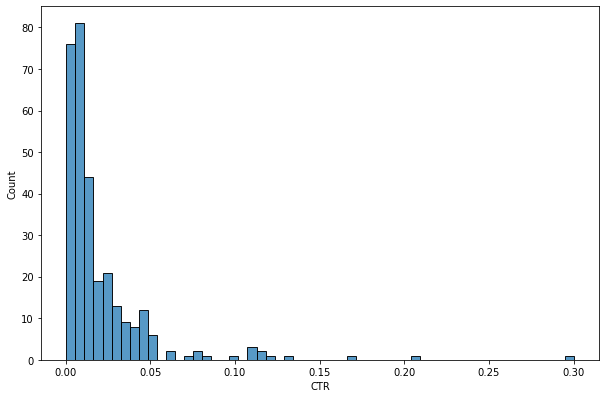

In [188]:
#  CTR distribution 

plt.figure(figsize=(10, 6.5))
sns.histplot(ad_by_click_by_view.CTR, kde=False)

In [189]:
# Most data is on the left side: these ads have small CTR
# Further research should be based on median CTR (mean CTR would lower CTR values for a lot of ads)

In [ ]:
# What is the 95 percentile of ads CTR on 2019_04_04?

In [141]:
# query data for 2019_04_04

df_2019_04_04 = ads_data[ads_data.date == '2019-04-04'] \
        .groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index='ad_id', columns='event', values='time').reset_index() \
        .fillna(0)

In [142]:
# CTR on 2019_04_04

df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [143]:
# 95th percentile of CTR on 2019_04_04

df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95) * 100

10.211538461538455

In [ ]:
# 5% of all ads had not less than 10 clicks for 100 views. 95% of ads - less.

In [202]:
# Let's take a look at ads CTR with / -out video. 

In [144]:
# query ads w/o video

df_no_video = ads_data[ads_data.has_video == 0] \
        .groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index='ad_id', columns='event', values='time').reset_index() \
        .fillna(0)

# CTR 
df_no_video['ctr'] = df_no_video.click / df_no_video.view

# 95th percentile for ads w/o video

df_no_video[df_no_video.click > 0].ctr.quantile(q=0.95) * 100

11.189039808501136

In [145]:
# query ads with video

df_video = ads_data[ads_data.has_video > 0] \
        .groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index='ad_id', columns='event', values='time')

#  CTR 
df_video['ctr'] = df_video.click / df_video.view

# 95th percentile for ads with video

df_video[df_video.click > 0].ctr.quantile(q=0.95) * 100

1.3004063046057863

Ads w/o video have higher CTR (by 8.6 times) - people click more on ads w/o video. 

Ads with video have CTR of 1.3 % which is rather high. 

Ads w/o video have CTR of 11 % - sounds unrealisticly high. The marketing department are geniuos! (Though of course we know that this is random data)

In [203]:
# Let's take a look at revenue per day!

In [147]:
# revenue from CPC ads

ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')].ad_cost.sum()

84810.0

In [148]:
# revenue from CPM ads

ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].ad_cost.sum() / 1000

497090.6778000003

In [149]:
# revenue from CPC ads by day

earnings_per_day = ads_data.query('ad_cost_type =
                                  = "CPC" and event == "click"') \
        .groupby('date').agg({'ad_cost':'sum'})

In [150]:
# revenue from CPM ads by day

CPM = ads_data.query('ad_cost_type == "CPM" and event == "view"') \
        .groupby('date').agg({'ad_cost':'sum'})
CPM.ad_cost = CPM.ad_cost / 1000

In [151]:
# revenue per day

earnings_per_day['earned'] = earnings_per_day.ad_cost + CPM.ad_cost
earnings_per_day = earnings_per_day.reset_index().drop(columns='ad_cost')
earnings_per_day

,date,earned
0,2019-04-01,13159.712300
1,2019-04-02,33837.005100
2,2019-04-03,73209.517000
3,2019-04-04,46294.356800
4,2019-04-05,358559.748996
5,2019-04-06,56840.337600


In [204]:
# double check: total revenue equals to CPC revenue + CPM revenue

round(earnings_per_day.earned.sum()) == round((84810.0 + 497090.6778000003))

True

In [153]:
earnings_per_day.sort_values('earned')

,date,earned
0,2019-04-01,13159.712300
1,2019-04-02,33837.005100
3,2019-04-04,46294.356800
5,2019-04-06,56840.337600
2,2019-04-03,73209.517000
4,2019-04-05,358559.748996


In [ ]:
# The smallest revenue was on 2019-04-01. The highest - on 2019-04-05

In [ ]:
# What platform is the most popular in terms of ads placement?

In [155]:
# number of events by platform 

ads_data.groupby('platform', as_index=False) \
        .agg({'event':'count'}) \
        .sort_values('platform') \
        .rename(columns={'event':'events_number'})

,platform,events_number
0,android,1588211
1,ios,953078
2,web,635425


In [156]:
# number of views by platform 

views_by_platform = ads_data.query('event == "view"') \
        .groupby('platform', as_index=False) \
        .agg({'event':'count'}) \
        .sort_values('platform') \
        .rename(columns={'event':'events_number'})

In [157]:
# views by platform in %

views_by_platform['events_number_percentage'] = round(
                                    views_by_platform.events_number * 100 
                                    / views_by_platform.events_number.sum(), 2
)
views_by_platform

,platform,events_number,events_number_percentage
0,android,1295189,50.02
1,ios,776114,29.97
2,web,517948,20.00
